<a href="https://colab.research.google.com/github/ctclumak/Tensorflow-2-and-Keras-Deep-Learning/blob/master/CNN_ON_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from tensorflow.keras.datasets import mnist

In [5]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
X_train.shape

(60000, 28, 28)

In [0]:
single_image = X_train[0]

In [8]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

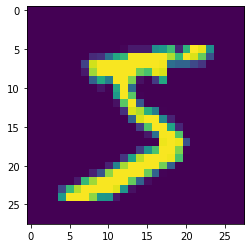

In [10]:
plt.imshow(single_image)

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train.shape

(60000,)

In [0]:
y_example = to_categorical(y_train)

In [15]:
y_example.shape

(60000, 10)

In [17]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [0]:
y_cat_train = to_categorical(y_train,10)

In [21]:
single_image.max()

255

In [22]:
single_image.min()

0

In [0]:
X_train = X_train/255

In [0]:
X_test = X_test/255

In [0]:
scaled_image = X_train[0]

In [28]:
scaled_image.max()

1.0

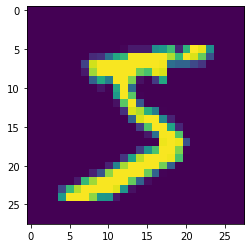

In [29]:
plt.imshow(scaled_image)

In [30]:
X_train.shape

(60000, 28, 28)

In [0]:
#batch_size, width, height, color_channels
X_train = X_train.reshape(60000,28,28,1)

In [0]:
X_test = X_test.reshape(10000, 28,28,1)

## **Create a Model**

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten

In [0]:
model = Sequential()
#the input_shape is determine by your data
model.add(Conv2D(filters = 32, kernel_size = (4,4),input_shape = (28,28,1),activation ="relu" ))
#SAME Automatically decide what the padding should be, default is padding = valude
model.add(MaxPool2D(pool_size = (2,2))) # pool_size = (2,2) is default
model.add(Flatten())
model.add(Dense(128,activation = "relu"))

#OUTPUT LAYER SOFTMAX -> MULTI CLASS
model.add(Dense(10,activation = "softmax")) # the final Dense layer should equal to the number of neuron to your classification
# if you are dealing with a binery classification problem, then this would be a binery classification with just one neuron output with an activation of sigmoid
model.compile(loss = "categorical_crossentropy", optimizer="adam", 
              metrics = ['accuracy'])

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [51]:
early_stop = EarlyStopping(monitor = "val_loss", patience = 1)
model.fit(X_train,y_cat_train,epochs = 10, validation_data=(X_test, y_cat_test), callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 37s 610us/sample - loss: 0.1397 - acc: 0.9588 - val_loss: 0.0627 - val_acc: 0.9802
Epoch 2/10
60000/60000 [==============================] - 36s 602us/sample - loss: 0.0501 - acc: 0.9846 - val_loss: 0.0421 - val_acc: 0.9863
Epoch 3/10
60000/60000 [==============================] - 36s 602us/sample - loss: 0.0317 - acc: 0.9899 - val_loss: 0.0491 - val_acc: 0.9829


## **Model Evaluation**

In [0]:
metrics = pd.DataFrame(model.history.history)

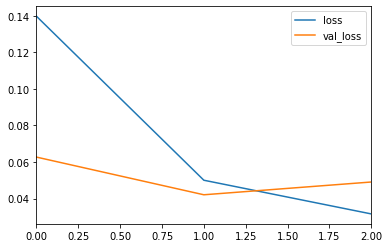

In [54]:
metrics[['loss', 'val_loss']].plot()

In [59]:
model.metrics_names

['loss', 'acc']

In [60]:
model.evaluate(X_test,y_cat_test, verbose = 0)

[0.04910383349212352, 0.9829]

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
predictions = model.predict_classes(X_test)

In [63]:
y_cat_test.shape

(10000, 10)

In [64]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [67]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.95      0.99      0.97      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.96      0.98       892
           6       0.99      0.98      0.98       958
           7       1.00      0.96      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [68]:
confusion_matrix(y_test, predictions)

array([[ 975,    0,    1,    1,    0,    0,    3,    0,    0,    0],
       [   0, 1129,    2,    1,    0,    1,    1,    0,    1,    0],
       [   1,    0, 1025,    2,    0,    0,    2,    1,    1,    0],
       [   0,    0,    3, 1004,    0,    1,    0,    0,    1,    1],
       [   0,    0,    0,    0,  963,    0,    5,    0,    2,   12],
       [   1,    0,    1,   26,    0,  860,    1,    0,    3,    0],
       [   7,    2,    0,    1,    1,    5,  938,    0,    4,    0],
       [   1,    2,   14,    6,    0,    1,    0,  986,    1,   17],
       [   3,    1,    3,    5,    0,    1,    0,    1,  956,    4],
       [   1,    1,    1,    6,    3,    1,    0,    1,    2,  993]])

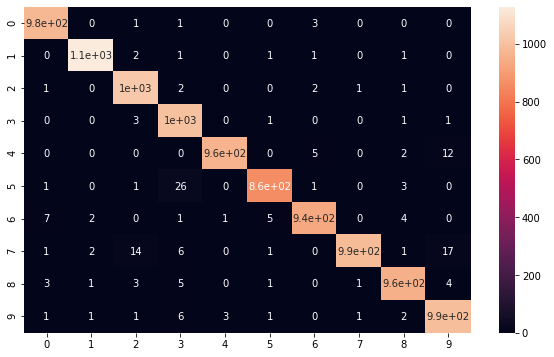

In [74]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [0]:
# predict a single image
my_number = X_test[0]

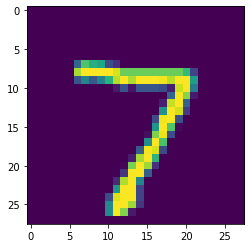

In [77]:
plt.imshow(my_number.reshape(28,28))

In [80]:
#num_images, width, heigh, color_channels
model.predict_classes(my_number.reshape(1,28,28,1))

array([7])